In [16]:
import pandas as pd
df = pd.read_csv('label_data.csv')
df.loc[df.label==9].head(100)

Unnamed: 0    id             file_path  label
105          105   105  batch_01_vt/0136.jpg      9
115          115   115  batch_01_vt/0149.jpg      9
137          137   137  batch_01_vt/0176.jpg      9
153          153   153  batch_01_vt/0194.jpg      9
165          165   165  batch_01_vt/0208.jpg      9
166          166   166  batch_01_vt/0209.jpg      9
168          168   168  batch_01_vt/0211.jpg      9
266          266   266  batch_01_vt/0334.jpg      9
758          758   758  batch_01_vt/0963.jpg      9
816          816   816  batch_01_vt/1042.jpg      9
838          838   838  batch_01_vt/1076.jpg      9
933          933   933  batch_01_vt/1229.jpg      9
2118        2118  2118  batch_02_vt/1497.jpg      9
2548        2548  2548     batch_03/0048.jpg      9
3111        3111  3111     batch_03/0771.jpg      9
3157        3157  3157     batch_03/0838.jpg      9
3165        3165  3165     batch_03/0853.jpg      9
3171        3171  3171     batch_03/0862.jpg      9
3172        3172  3172     batch_03/0863.jpg      9

In [5]:
{0: 'UNKNOWN', 1: 'General trash', 2: 'Paper', 3: 'Paper pack', 4: 'Metal', 5: 'Glass', 6: 'Plastic', 7: 'Styrofoam', 8: 'Plastic bag', 9: 'Battery', 10: 'Clothing'}

{0: 'UNKNOWN',
 1: 'General trash',
 2: 'Paper',
 3: 'Paper pack',
 4: 'Metal',
 5: 'Glass',
 6: 'Plastic',
 7: 'Styrofoam',
 8: 'Plastic bag',
 9: 'Battery',
 10: 'Clothing'}

In [1]:
from Datasets import *
from Models import *
from SwinTransformer import *
from albumentations.pytorch import ToTensorV2

test_transform = A.Compose([
                           ToTensorV2()
                           ])
testdataset = RecylceDatasets(data_dir= '../input/data/train_all.json', mode = 'train', transform = test_transform, resize=256)

Done (t=4.61s)
creating index...
index created!
load_complete!


In [2]:
# best model 저장된 경로
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SwinTransformerSmall()
model_path = '/opt/ml/code/saved/[BEST]mIoU_swin_Small_allData.pt'

# best model 불러오기
print(device)
checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint)

# 추론을 실행하기 전에는 반드시 설정 (batch normalization, dropout 를 평가 모드로 설정)
# model.eval()

cuda


<All keys matched successfully>

### Swin transforemr

Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {2, 'General trash'}, {9, 'Plastic bag'}]
ground Truth [{0.0, 'Background'}, {4.0, 'Paper pack'}]


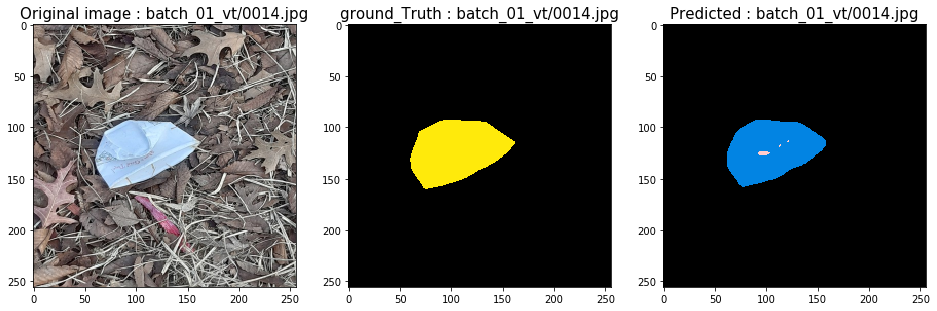

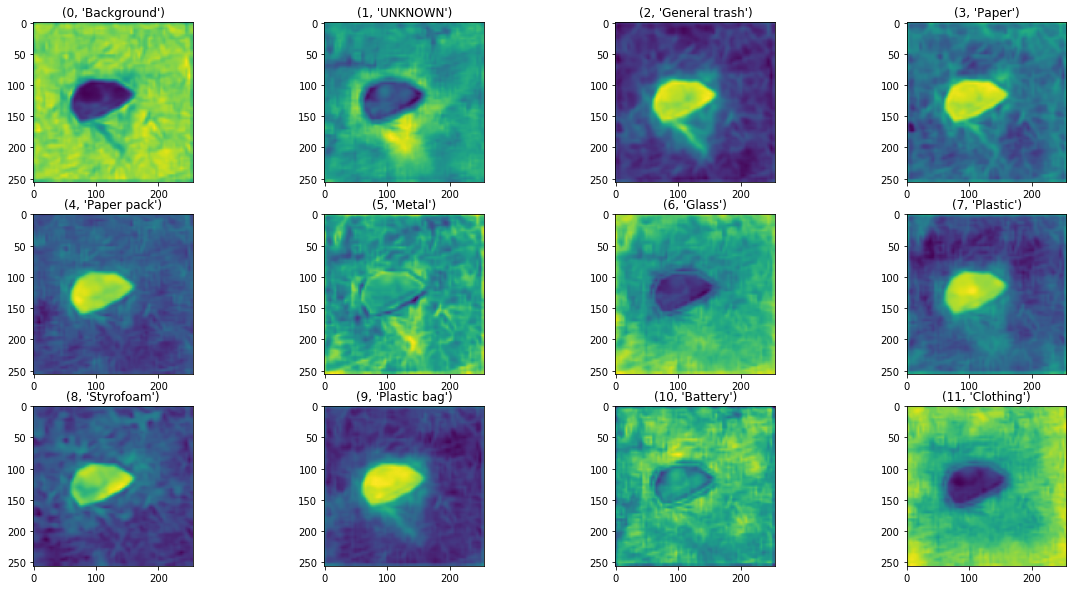

In [3]:
from Utils import *
paper_odds = inference_view(model=model, dataset=testdataset, idx = 10, confidence_plot=True,ground_truth=True)

Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {2, 'General trash'}, {3, 'Paper'}, {9, 'Plastic bag'}]
ground Truth [{0.0, 'Background'}, {2.0, 'General trash'}, {3.0, 'Paper'}, {5.0, 'Metal'}, {'Plastic', 7.0}, {9.0, 'Plastic bag'}, {'Clothing', 11.0}]


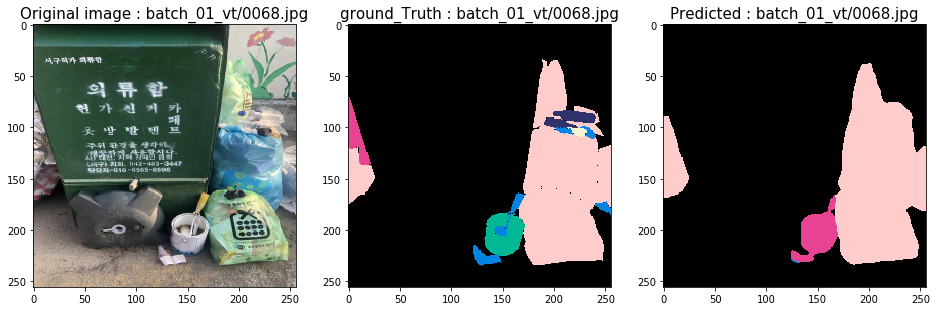

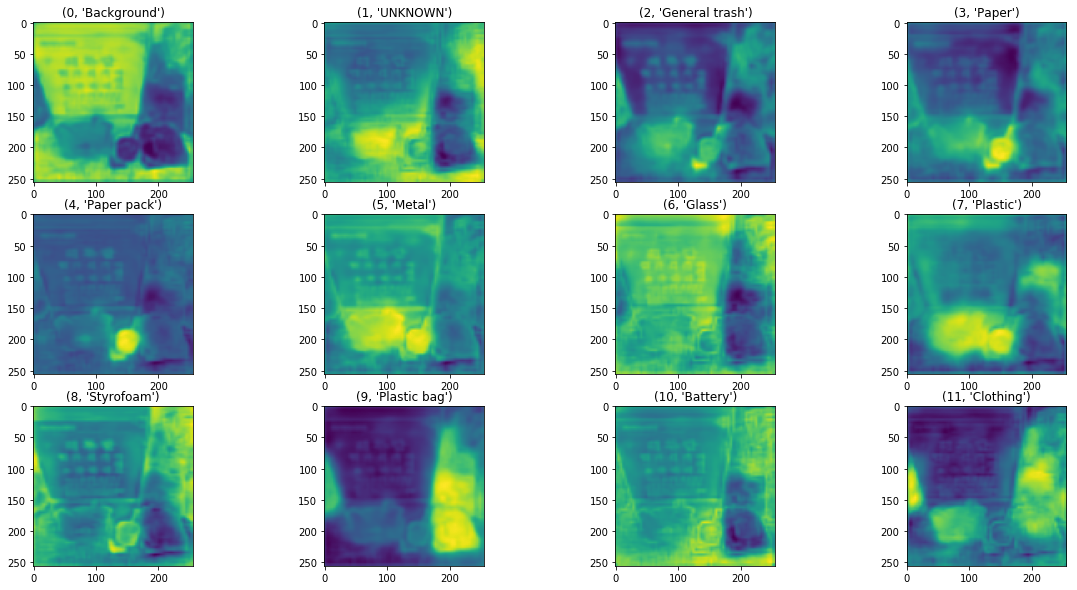

In [4]:
clothing = inference_view(model=model, dataset=testdataset, idx = 52, confidence_plot=True,ground_truth=True)

Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {'Clothing', 11}]
ground Truth [{0.0, 'Background'}, {2.0, 'General trash'}, {'Clothing', 11.0}]


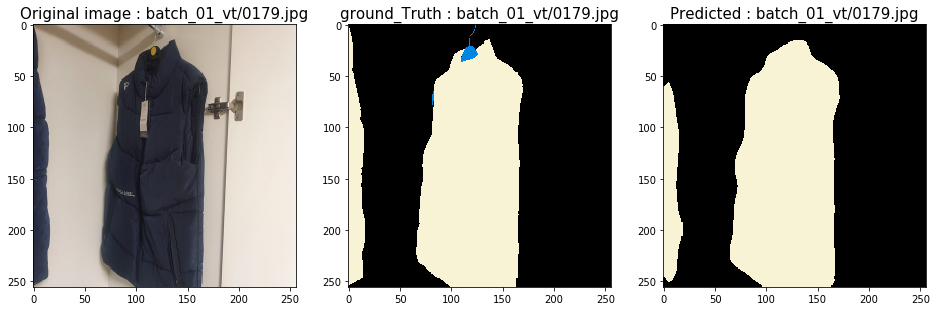

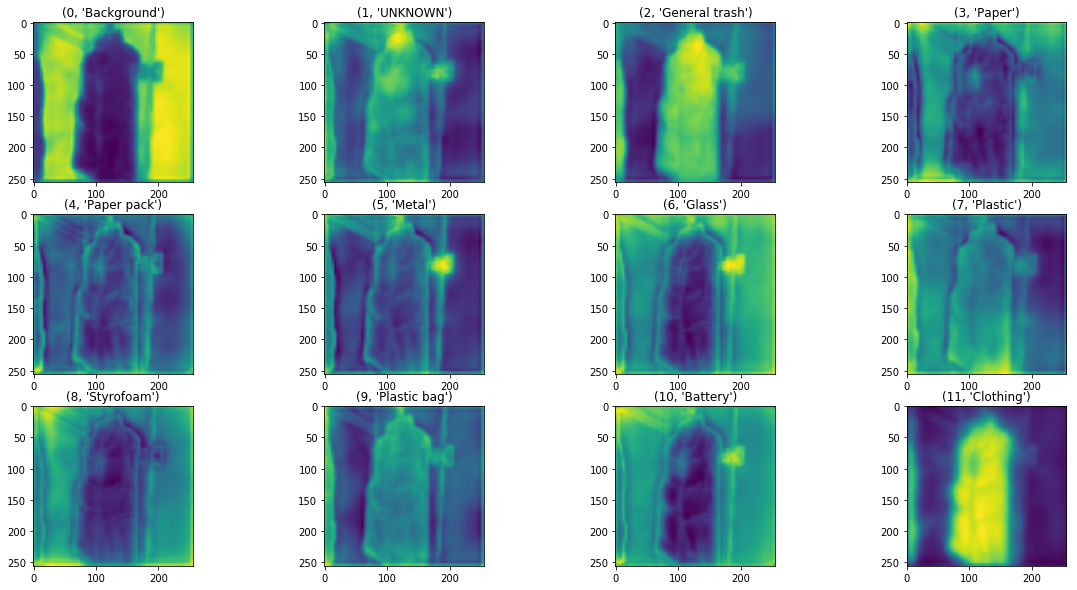

In [14]:
clothing = inference_view(model=model, dataset=testdataset, idx = 140, confidence_plot=True,ground_truth=True)

Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {'Battery', 10}]
ground Truth [{0.0, 'Background'}, {'Battery', 10.0}]


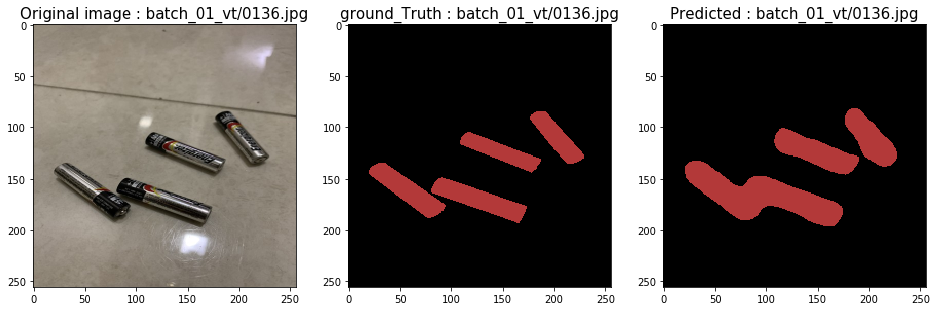

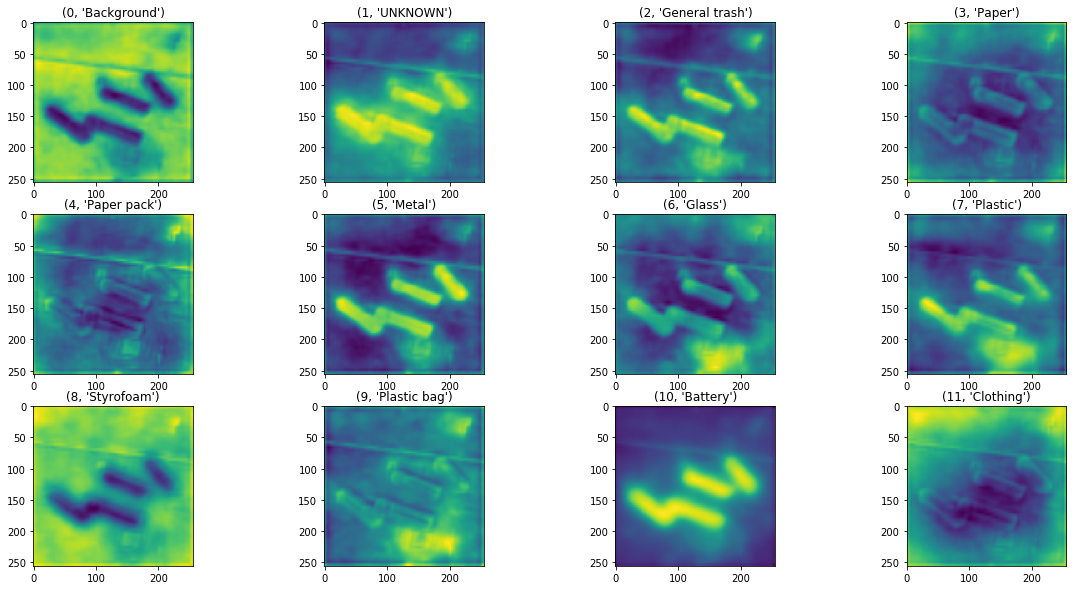

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {'Battery', 10}]
ground Truth [{0.0, 'Background'}, {'Battery', 10.0}]


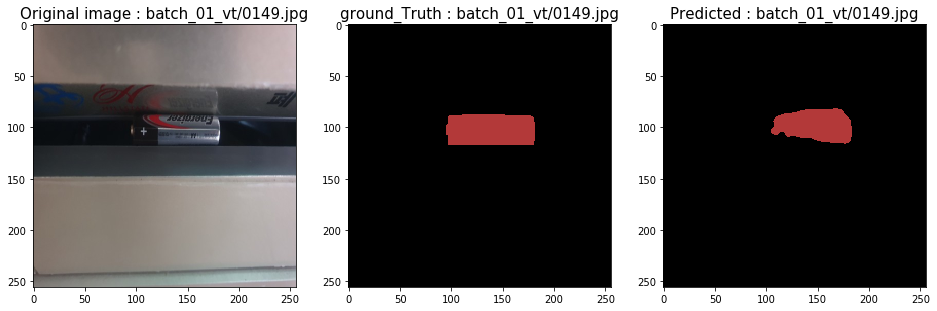

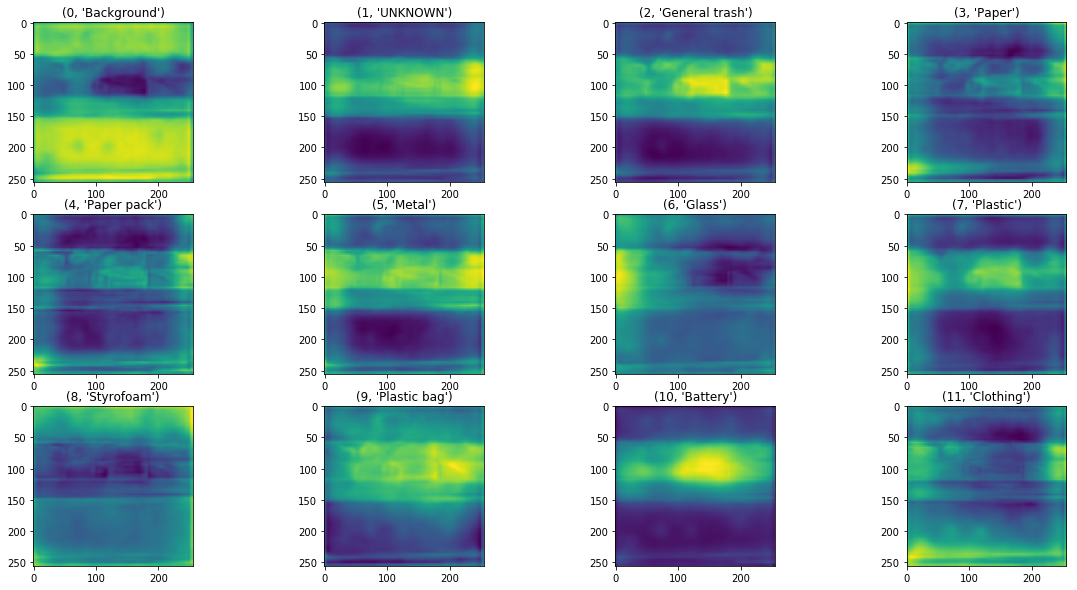

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {2, 'General trash'}, {3, 'Paper'}]
ground Truth [{0.0, 'Background'}, {3.0, 'Paper'}, {'Battery', 10.0}]


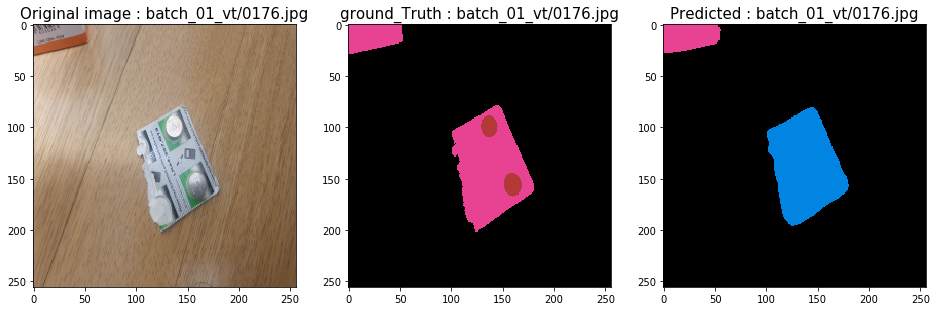

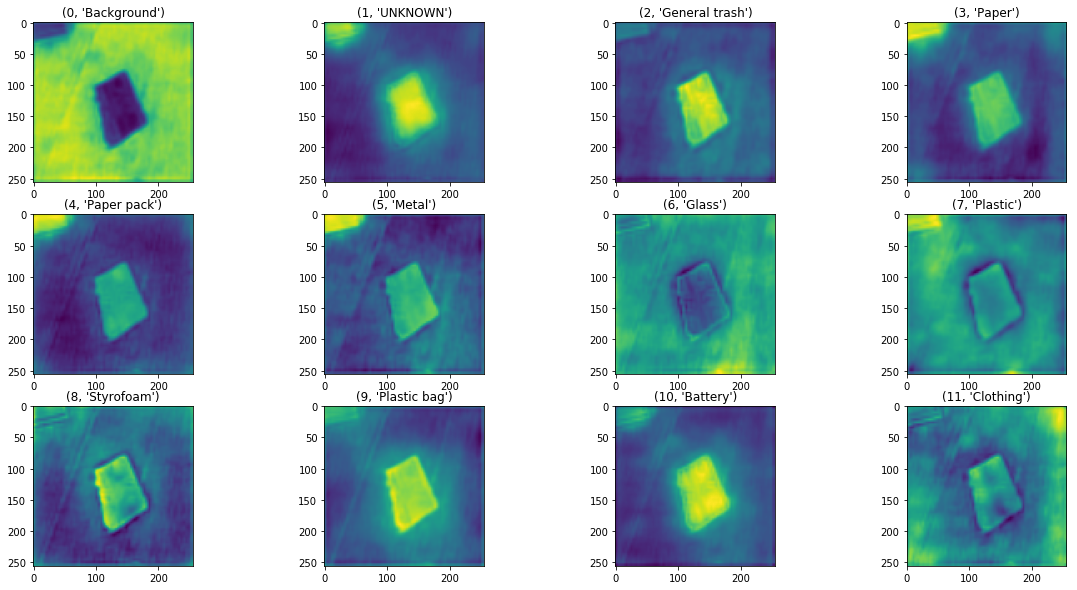

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {'Battery', 10}]
ground Truth [{0.0, 'Background'}, {'Battery', 10.0}]


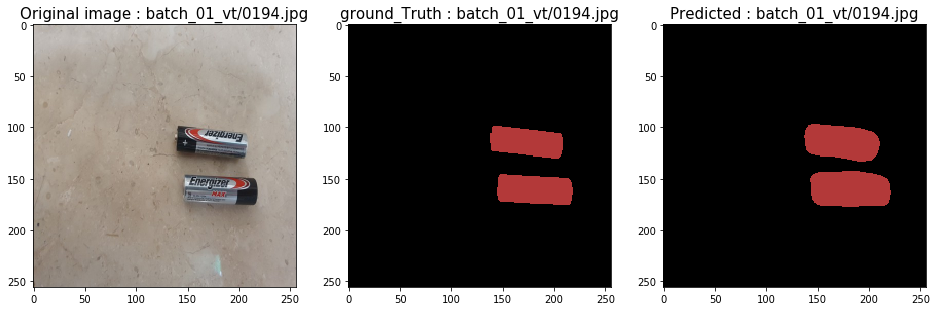

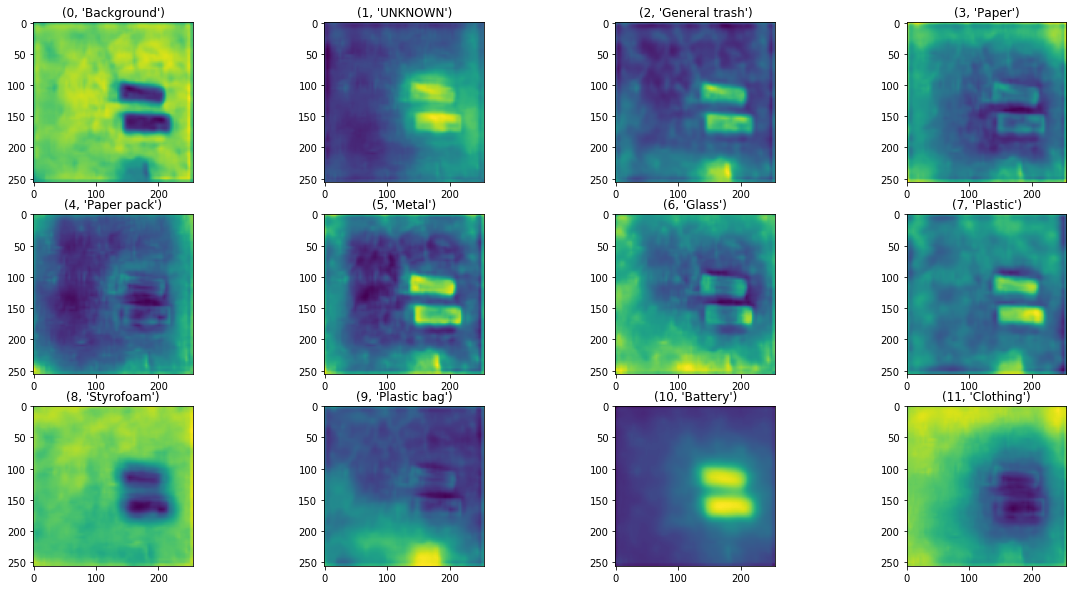

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {2, 'General trash'}, {'Battery', 10}]
ground Truth [{0.0, 'Background'}, {2.0, 'General trash'}, {'Battery', 10.0}]


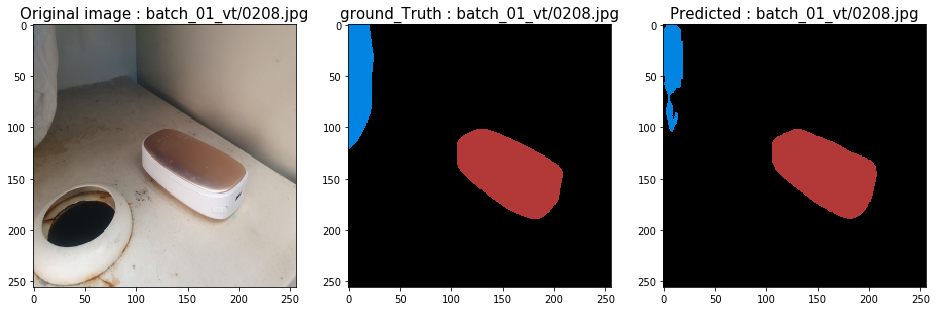

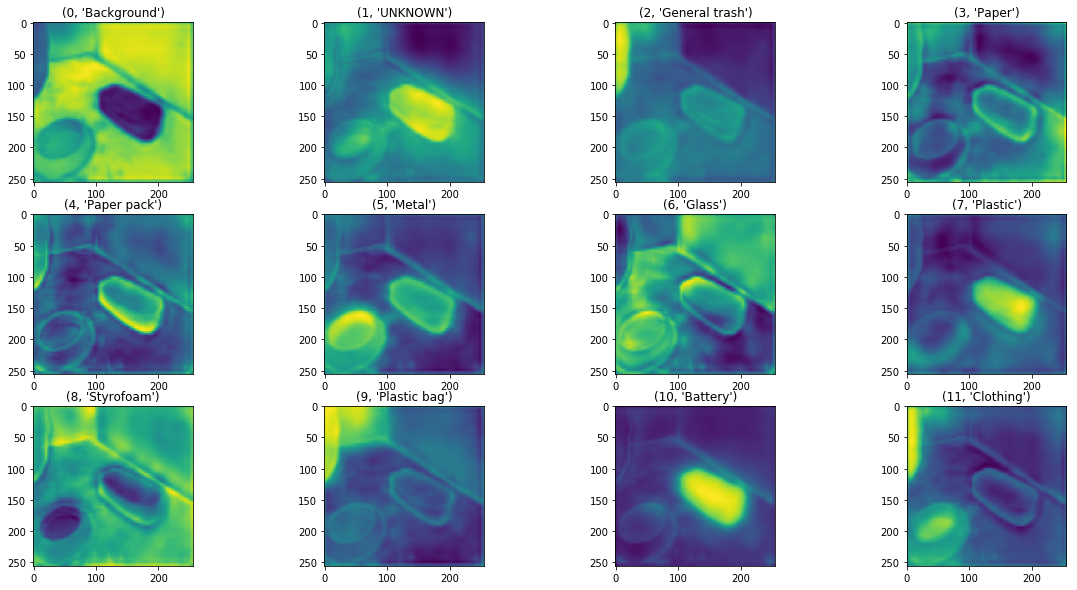

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {'Battery', 10}]
ground Truth [{0.0, 'Background'}, {'Battery', 10.0}]


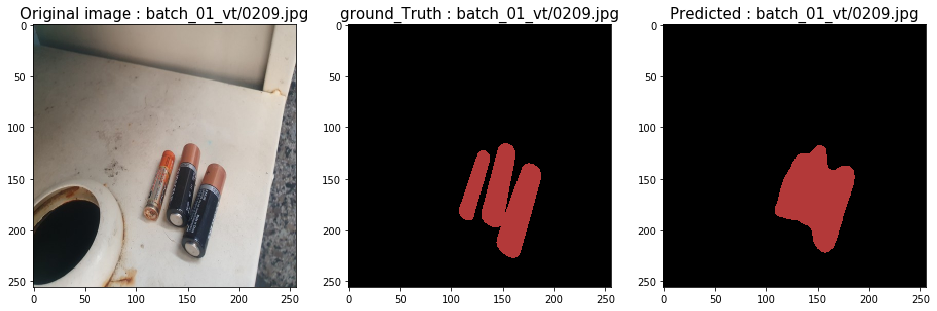

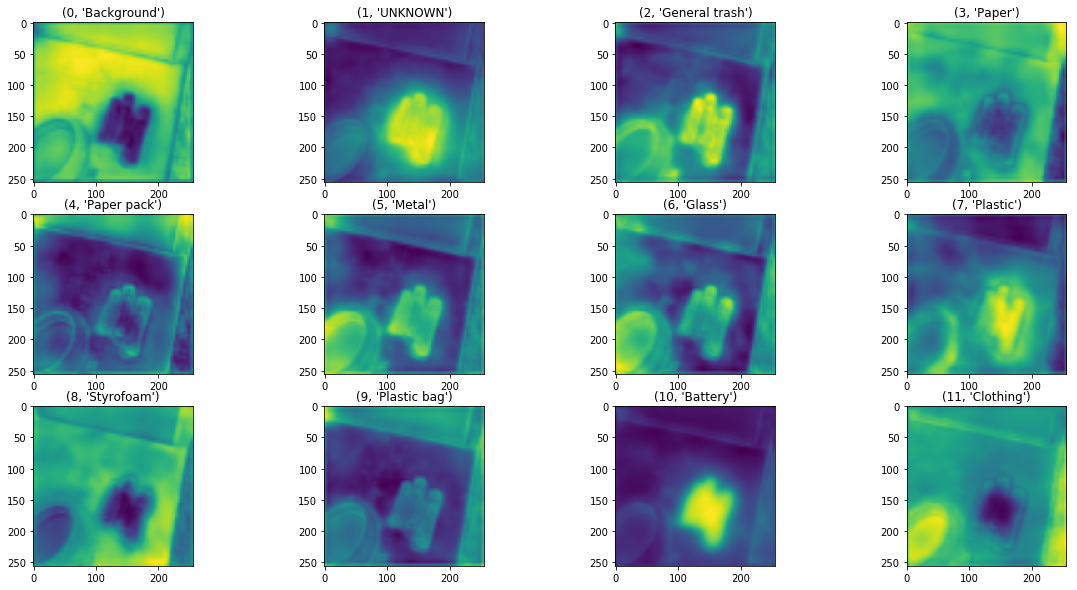

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {3, 'Paper'}, {'Plastic', 7}, {'Battery', 10}]
ground Truth [{0.0, 'Background'}, {3.0, 'Paper'}, {'Plastic', 7.0}, {9.0, 'Plastic bag'}, {'Battery', 10.0}]


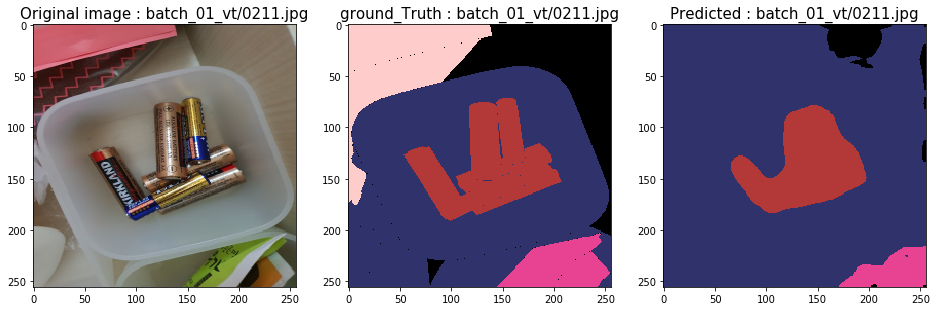

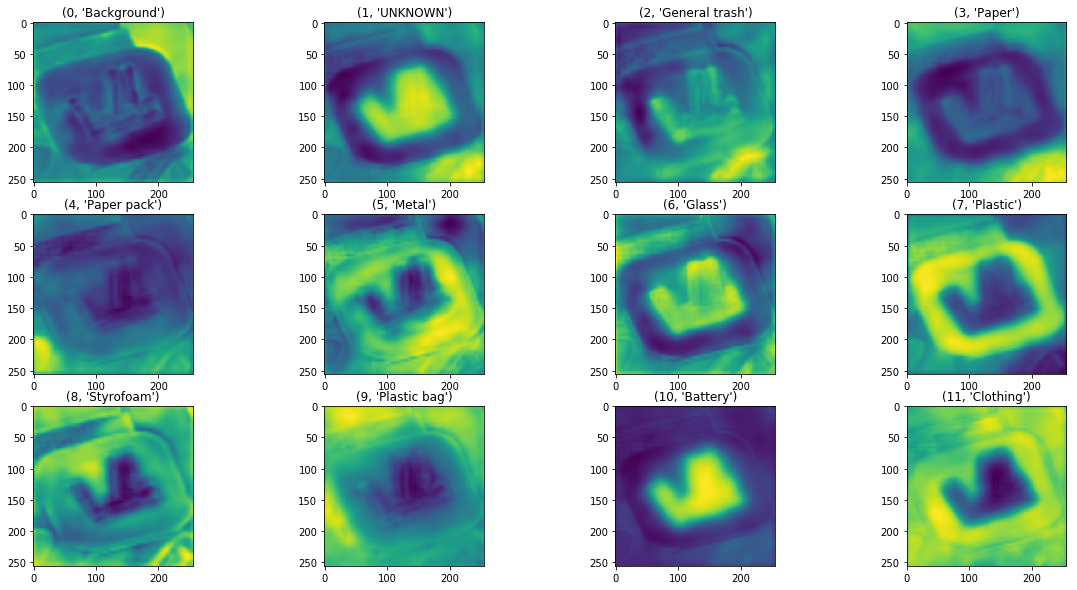

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {1, 'UNKNOWN'}, {3, 'Paper'}, {'Plastic', 7}, {'Battery', 10}]
ground Truth [{0.0, 'Background'}, {3.0, 'Paper'}, {'Plastic', 7.0}, {'Battery', 10.0}, {'Clothing', 11.0}]


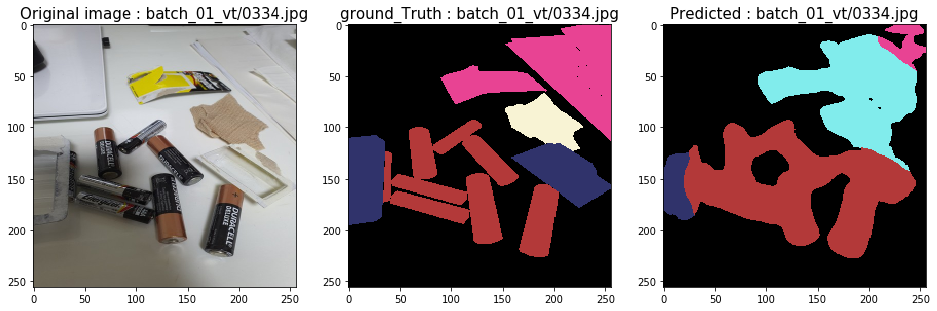

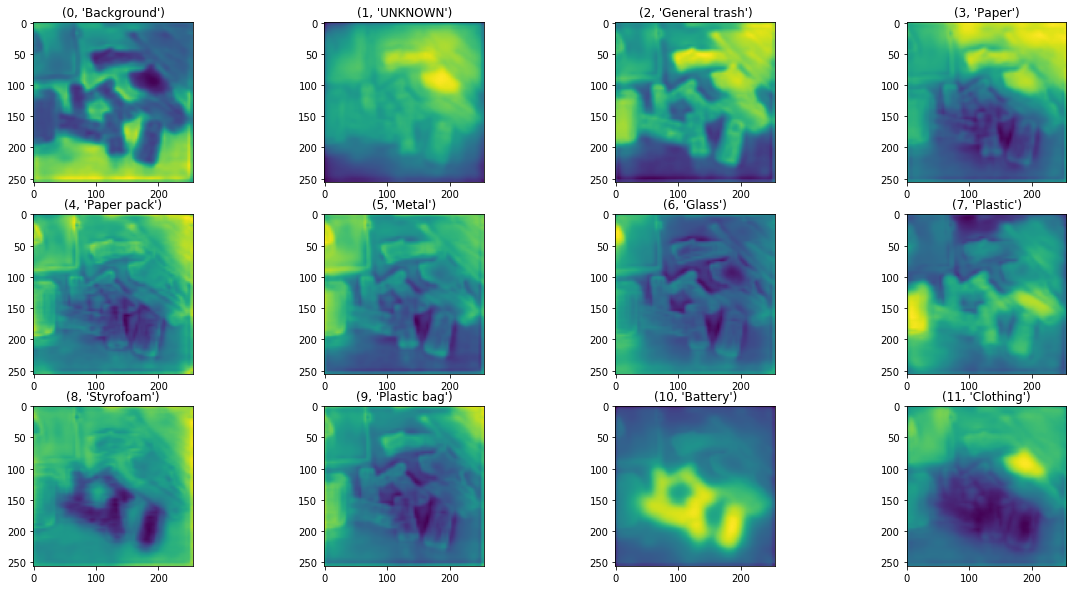

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {'Battery', 10}]
ground Truth [{0.0, 'Background'}, {'Battery', 10.0}]


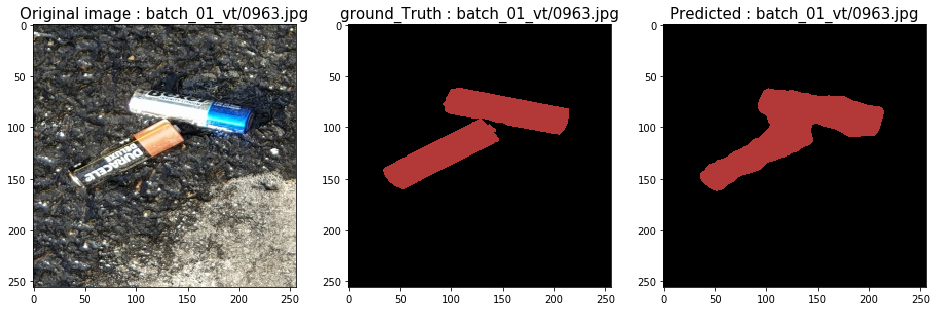

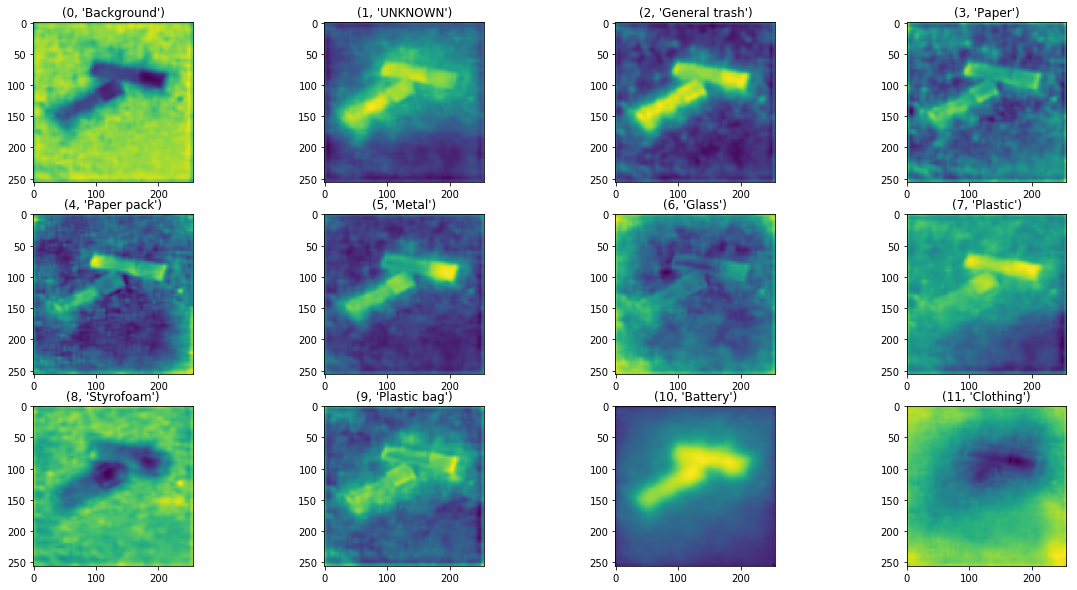

 0


Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {'Battery', 10}, {'Clothing', 11}]
ground Truth [{0.0, 'Background'}, {'Battery', 10.0}, {'Clothing', 11.0}]


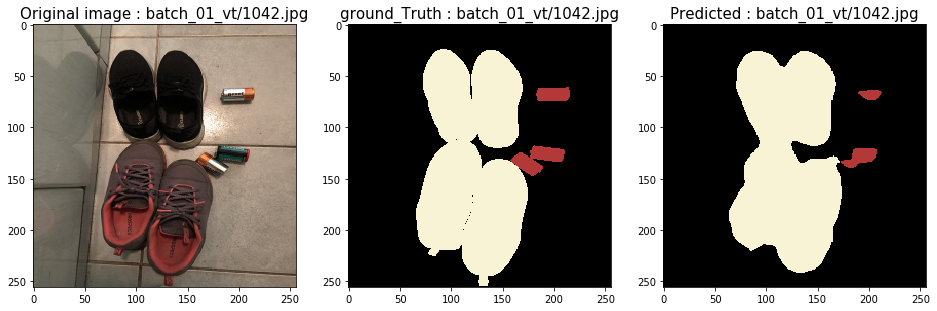

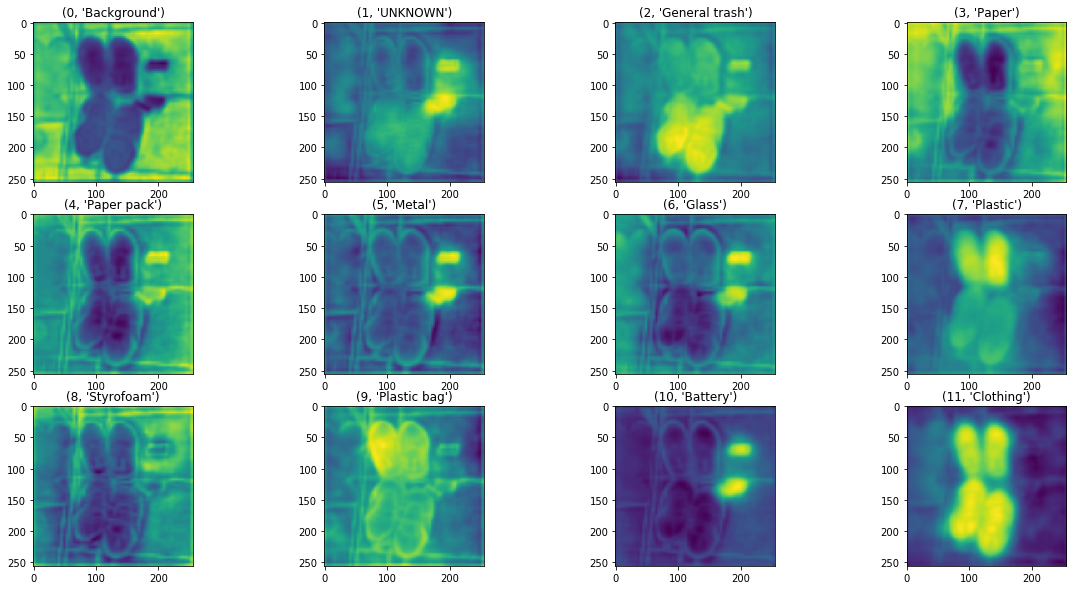

KeyboardInterrupt: Interrupted by user

In [22]:
for i in df.loc[df.label==9].id.values:
    bat = inference_view(model=model, dataset=testdataset, idx = i, confidence_plot=True,ground_truth=True)
    a = input()
    if int(a) == 1:
        break
    else:
        pass

#### Deeplabv3+Resnext50 cosine constant

cuda
Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {3, 'Paper'}]


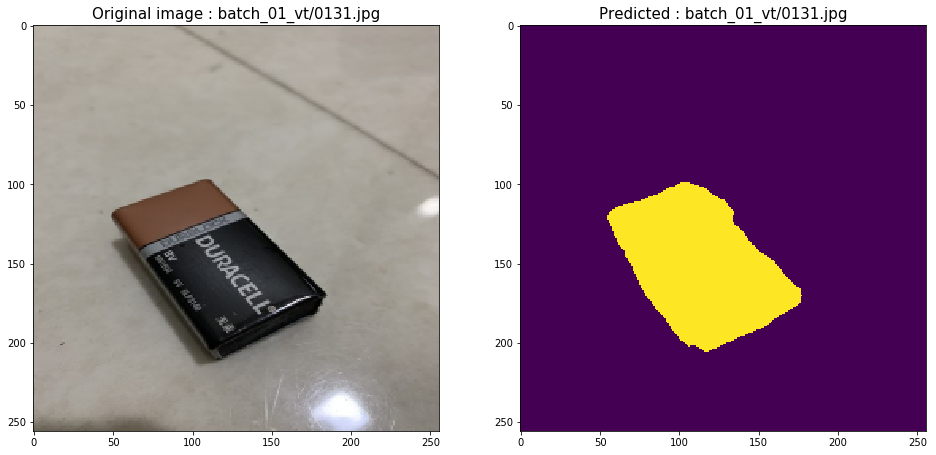

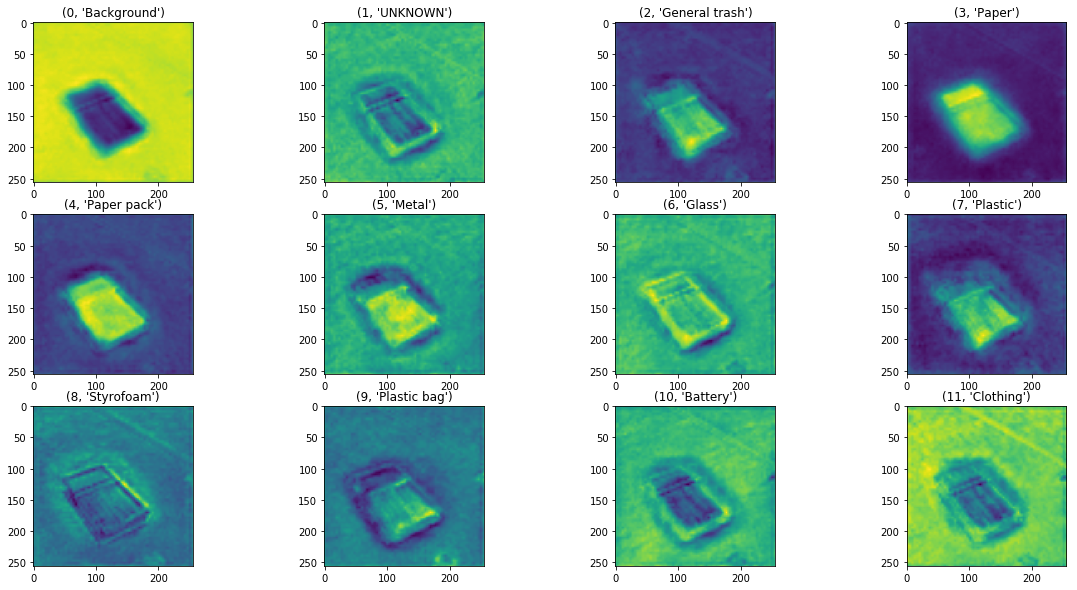

In [5]:
# best model 저장된 경로
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Deeplabv3Plus_resnext50_32x4d()
model_path = 'saved/mIoU_deeplabv3Plus_resnext50_32x4d_adamp_stepLR_transform.pt'

# best model 불러오기
print(device)
checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint)

from Utils import *
a = inference_view(model=model, dataset=testdataset, idx = 10, confidence_plot=True)

Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {2, 'General trash'}, {3, 'Paper'}, {'Metal', 5}, {9, 'Plastic bag'}]


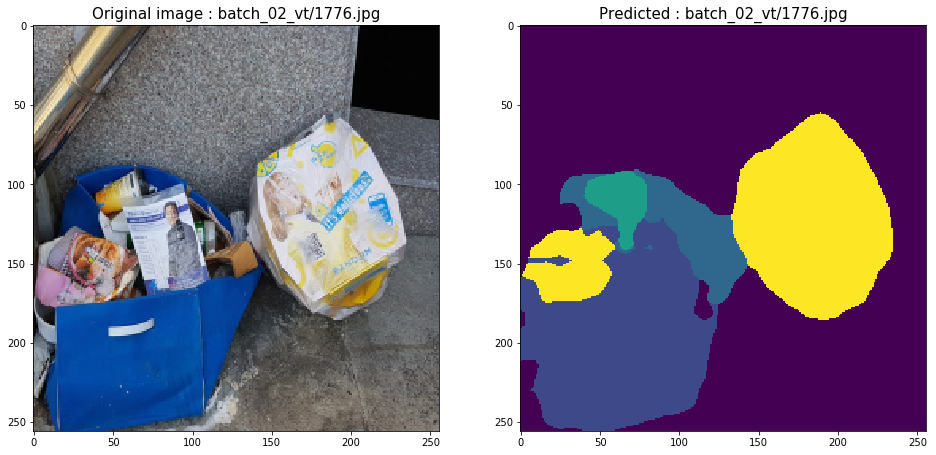

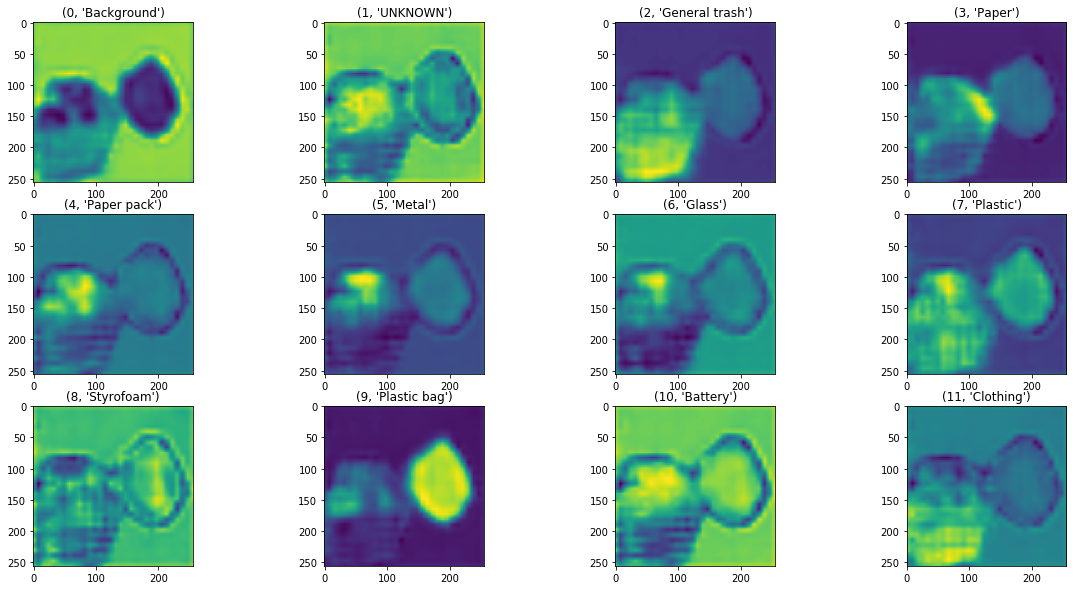

In [5]:
a = inference_view(model=model, dataset=testdataset, idx = 305, confidence_plot=True)

In [3]:
from Inference import infer
# self, model, save_path, data_loader,submission_file_name 
inference = infer(model='deeplabv3_resnet101', 
          save_path='/opt/ml/code/saved/deeplabv3_resnet101(pretrained).pt',
         data_loader=test_loader,
         submission_file_name="3th_deeplabv3_resnet101(pretrained).csv")


cuda
model load

